In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Считываем датасет и преобразуем все столбцы в маленький регистр

In [ ]:
df = pd.read_csv("whr2023.csv")
df.columns = df.columns.str.lower()
df.head()

,country name,iso alpha,regional indicator,happiness score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,...,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,ARM,Commonwealth of Independent States,5.342,0.066,5.470,5.213,9.615,0.790,67.789,...,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


Посмотрим информацию о наборе данных, проверим количсетво пропущенных значений в каждом столбце

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country name                                137 non-null    object 
 1   iso alpha                                   137 non-null    object 
 2   regional indicator                          137 non-null    object 
 3   happiness score                             137 non-null    float64
 4   standard error of ladder score              137 non-null    float64
 5   upperwhisker                                137 non-null    float64
 6   lowerwhisker                                137 non-null    float64
 7   logged gdp per capita                       137 non-null    float64
 8   social support                              137 non-null    float64
 9   healthy life expectancy                     136 non-null    float64
 10  freedom to mak

In [ ]:
df.isnull().sum()


,0
country name,0
iso alpha,0
regional indicator,0
happiness score,0
standard error of ladder score,0
upperwhisker,0
lowerwhisker,0
logged gdp per capita,0
social support,0
healthy life expectancy,1


Найдем строки, в которых есть пропущенное значение. Это оказалась единственная строка, описывающая Палестину. В целом, заполнение пропущенных значений медианными либо самыми частыми значениями могут впоследствии привести к недостоверному анализу, поэтому было решено оставить так, как есть.

In [ ]:
df[df.isnull().any(axis = 1)]

,country name,iso alpha,regional indicator,happiness score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,...,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
116,State of Palestine,PSE,Middle East and North Africa,4.908,0.092,5.089,4.727,8.716,0.859,NaN,...,-0.132,0.836,1.778,1.144,1.309,NaN,0.416,0.065,0.067,NaN


Выделим отдельно только числовые столбцы, чтобы в будущем в нужых случаях работать только с ними (в наборе данных есть 3 столбца типа "object")

In [ ]:
num_col = ['happiness score', 'logged gdp per capita', 'social support', 'healthy life expectancy', 'freedom to make life choices', 'generosity', 'perceptions of corruption']
df[num_col].describe()

,happiness score,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


## Анализ корреляции показателя счастья с другими факторами

<Axes: >

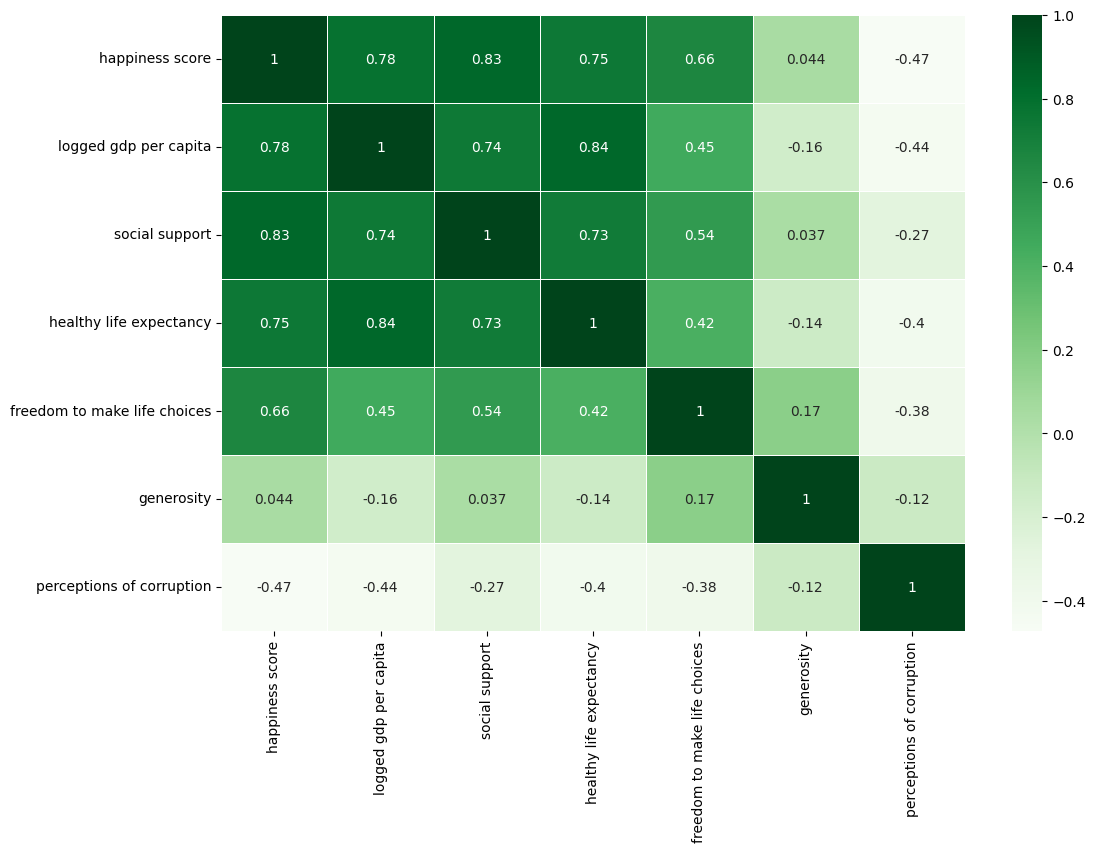

In [ ]:
corr = df[num_col].corr()
fig = plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = 'Greens', linewidth = 0.5, annot = True)

По графику видно, что фактор счастья сильно коррелирует с некоторыми другими признаками, а именно с уровнем ВВП в стране на душу населения, социальной поддержкой общества, свободой в принятии решений и ожидаемой продолжительностью жизни. Соотвественно, более высокие показатели в этих признаках способствуют увелечинению счастья в определенной стране.

Также на этой тепловой карте можно увидеть, что некоторые из перечисленных признаков также сильно коррелируют межлу собой. Например, более высокий уровень ВВП на душу населения способствует увелечению продолжительности жизни, а так же большей социальной поддержке. В тоже время, была обнаружена отрицательная корреляция между показателем счастья и восприятием коррупции. Это говорит нам о том, что поддержание высокого уровня счастья среди граждан может быть сложной задачей для стран с более высоким уровнем коррупции.

## Анализ  взаимосвязи между ВВП на душу населения и ожидаемой продолжительностью жизни и социальной поддержкой

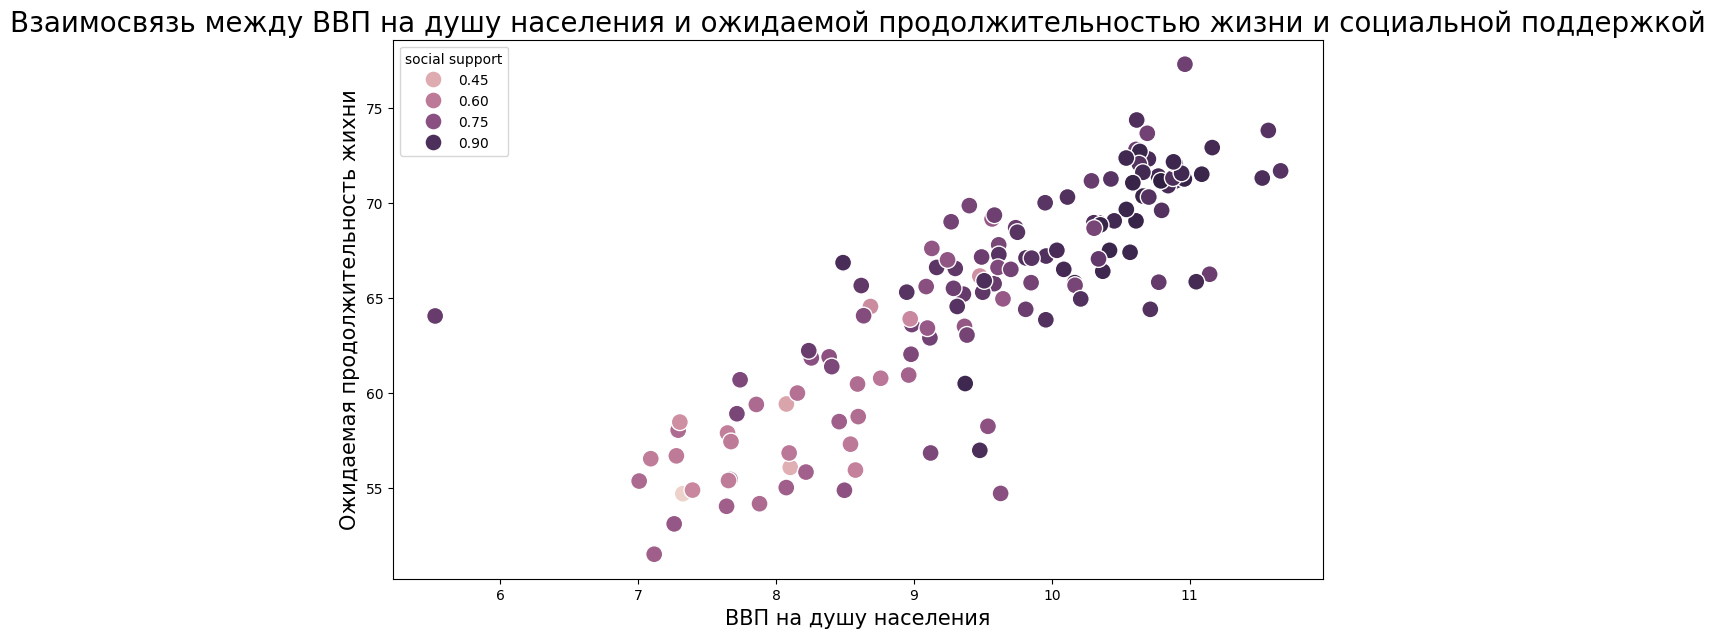

In [ ]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(df, x = "logged gdp per capita", y = "healthy life expectancy", hue = "social support", s = 150)
plt.xlabel("ВВП на душу населения", size = 15)
plt.ylabel("Ожидаемая продолжительность жихни", size = 15)
plt.title("Взаимосвязь между ВВП на душу населения и ожидаемой продолжительностью жизни и социальной поддержкой", size = 20)
plt.show()

Данный график в некотором смысле подтвержадет сделанный ранее вывод: чем выше уровень ВВП и ожидаемая продолжительность жизни, тем большая социальная поддержка оказывается населению. Хотя иногда бывают некоторые выбросы, такие что даже при относительно невысокой ожидаемой продолжительности жизни (но все еще достататочно высоким уровнем ВВП на душу населения) присутсвует большая соц.поддержка. Это, возможно, объясняется спецификой каждой страны.

## Анализ уровня счастья по регионам

Text(0.5, 1.0, 'Уровень счастья по регионам')

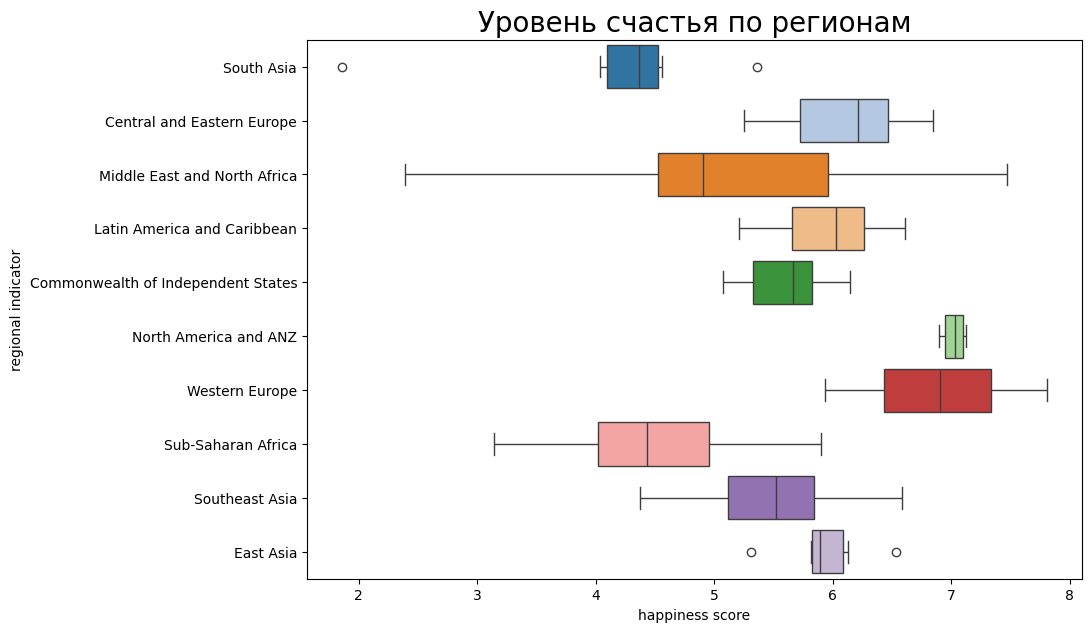

In [ ]:
fig = plt.figure(figsize = (10,7))
sns.boxplot(df, y = 'regional indicator', x = "happiness score", palette = 'tab20')
plt.title("Уровень счастья по регионам", size = 20)

Анализ графиков показывает, что более высокие показатели фактора счастья наблюдаются в Северной Америке, Европе (Центральной, Востояной и западной), Юго-Востояной Азии и по сравнению с другими регионами. В Южной и Восточной Азии (по отедльности) наблюдается средний уровень счастья, но со значительными выбросами, в меньшую сторону в том числе (показатель 2 в Южной Азии может быть свойтсвенен Афганистану - он из всех стран этого региона самый военно-нестабильный и кризисный).

Регион Ближнего востока и Северной Африки имеет большой разбор показателя счастья, так как содержит как развитые страны, так и и не очень.
